### Code to plot a telemetry profile - Running this notebook with plot the most recent saved data that you generated
#### 2021 0128 CJH
#### See telemetry_plot.ipynb for more information
---
* Imports a file with helper function definitions `import telemetry_plot_utils as tpu ` 
* Reads data from the robot/sim/data folder with `telemetry = tpu.load_file(file)`
* Converts that data to a useful pandas dataframe with `df = tpu.fix_data(telemetry)`
  * `df, telemetry = tpu.get_data(file_name='20210130_151440', x_offset=0, y_offset=0.0)` combines the load and table functions
* Gets a list of the pathweaver points with `df_points = tpu.get_points_df(name='bounce')`
* Plots them all together with plot_df, e.g. `tpu.plot_df(df_slalom_weave, telemetry_slalom_weave, point_df=df_slalom_points, background='slalom', arrows=True, save=False)`
* Plots the velocity profiles with e.g. `tpu.velocity_plot(df_slalom_weave)`

In [54]:
#from networktables import NetworkTables
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import numpy as np
import pickle
import glob
from importlib import reload

In [55]:
import telemetry_plot_utils as tpu 

### loading point lists from pathweaver files - use this explicitly if the 'guess' option fails
* just pass the function the unique part of the name of the file you want the points for and this gets plotted on the summary

In [56]:
path_weaver_files = data_files = glob.glob('../robot/pathweaver/paths/*')
print(path_weaver_files)

['../robot/pathweaver/paths\\barrel_pw0', '../robot/pathweaver/paths\\barrel_pw1', '../robot/pathweaver/paths\\barrel_test', '../robot/pathweaver/paths\\bounce_pw0', '../robot/pathweaver/paths\\bounce_pw1', '../robot/pathweaver/paths\\bounce_pw2', '../robot/pathweaver/paths\\bounce_pw3', '../robot/pathweaver/paths\\bounce_pw4', '../robot/pathweaver/paths\\calibrate', '../robot/pathweaver/paths\\calibrate_rev', '../robot/pathweaver/paths\\slalom_pw0', '../robot/pathweaver/paths\\slalom_pw1']


In [57]:
df_points = tpu.get_points_df(name='slalom')
df_points.head()

,X,Y,Tangent X,Tangent Y,Fixed Theta,Reversed,Name
0,1.100000,0.693851,1.496951,0.048044,True,False,NaN
1,2.155267,1.598042,0.495847,0.787522,True,False,NaN
2,3.255297,2.464733,0.773185,0.282648,True,False,NaN
3,4.567833,2.843910,0.900373,0.005905,False,False,NaN
4,5.956108,2.435268,0.736784,-0.433048,True,False,NaN


#### trick to get all four bounce paths in one point list

In [58]:
bounces = ['bounce_pw'+str(i+1) for i in range(4)]
dfs = []
for bounce_file in bounces:
    dfs.append(tpu.get_points_df(name=bounce_file))
df_bounce_points = pd.concat(dfs)
df_bounce_points

,X,Y,Tangent X,Tangent Y,Fixed Theta,Reversed,Name
0,1.100000,2.330814,2.337463,-0.004591,True,False,NaN
1,2.042570,2.711736,0.064046,0.128093,True,False,NaN
2,2.244029,3.125846,0.000103,0.100000,True,False,NaN
0,2.339525,3.277770,0.060000,0.600000,True,True,NaN
1,3.262517,1.435829,-0.715281,0.257468,True,True,NaN
2,4.527231,2.062590,-0.111922,-1.488558,True,True,NaN
3,4.661537,2.920000,0.000000,-0.010000,True,True,NaN
0,4.626897,3.120000,-0.009149,-0.320232,True,False,NaN
1,4.764139,1.502769,0.548969,-0.594717,True,False,NaN
2,5.780754,1.066487,0.570800,0.190267,True,False,NaN


In [59]:
df_data, telemetry = tpu.get_data(file_name=-1, x_offset=0, y_offset=0)
df_data.columns


Index(['TIME', 'RBT_X', 'RBT_Y', 'RBT_TH', 'RBT_VEL', 'RBT_RVEL', 'RBT_LVEL',
       'TRAJ_X', 'TRAJ_Y', 'TRAJ_TH', 'TRAJ_VEL', 'RAM_VELX', 'RAM_LVEL_SP',
       'RAM_RVEL_SP', 'RAM_OM', 'LFF', 'RFF', 'LPID', 'RPID', 'DELTA', 'VEC_X',
       'VEC_Y'],
      dtype='object')

In [60]:
df_data.head()

,TIME,RBT_X,RBT_Y,RBT_TH,RBT_VEL,RBT_RVEL,RBT_LVEL,TRAJ_X,TRAJ_Y,TRAJ_TH,...,RAM_LVEL_SP,RAM_RVEL_SP,RAM_OM,LFF,RFF,LPID,RPID,DELTA,VEC_X,VEC_Y
0,0.060422,1.082541,0.653981,0.020140,0.038669,0.038509,0.038830,1.102735,0.645976,0.033230,...,0.094547,0.095946,0.003588,3.232281,3.282419,0.0,0.0,0.009975,0.009972,0.000211
1,0.160262,1.092514,0.654186,0.021184,0.179073,0.174597,0.183550,1.119243,0.646727,0.040146,...,0.247575,0.265851,0.046860,3.437528,3.809608,0.0,0.0,0.009975,0.009972,0.000211
2,0.260223,1.118066,0.654795,0.028327,0.327855,0.304433,0.351278,1.150734,0.648162,0.053339,...,0.387418,0.460420,0.187187,3.512326,4.491998,0.0,0.0,0.025560,0.025550,0.000724
3,0.359142,1.157934,0.656332,0.050791,0.481867,0.416891,0.546843,1.196627,0.650401,0.074227,...,0.508655,0.689600,0.463963,3.550294,5.453028,0.0,0.0,0.039897,0.039846,0.002026
4,0.459154,1.214501,0.660546,0.101097,0.645537,0.514356,0.776718,1.257642,0.656929,0.136359,...,0.615561,0.954036,0.867884,3.570029,6.227835,0.0,0.0,0.056724,0.056435,0.005725


---
#### Plot the most recent trajectory - you have to run the ramsete command and select "write_data" to be true in the dashboard to save data
* To plot something else, change the filename in tpu.getdata().  It defaults to finding the most recent file in robot/sim/data.
* Now it is guessing which set of points you need if you set `guess_points=True`.  Set to false and it will use the point_df you specify
* Don't use guess on bounce yet

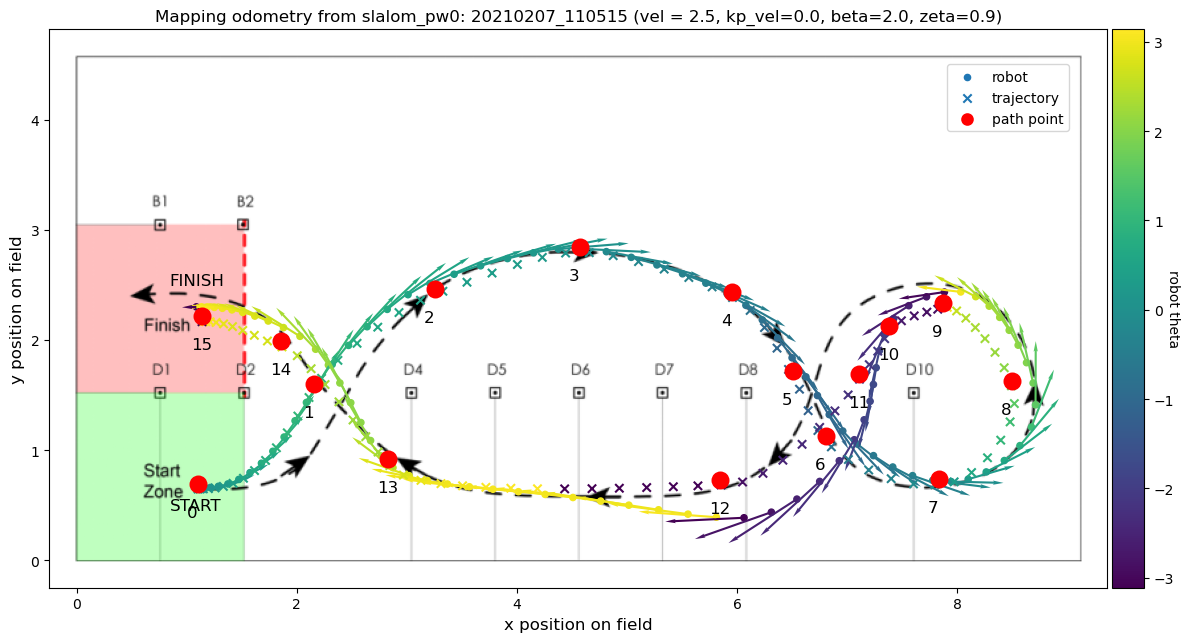

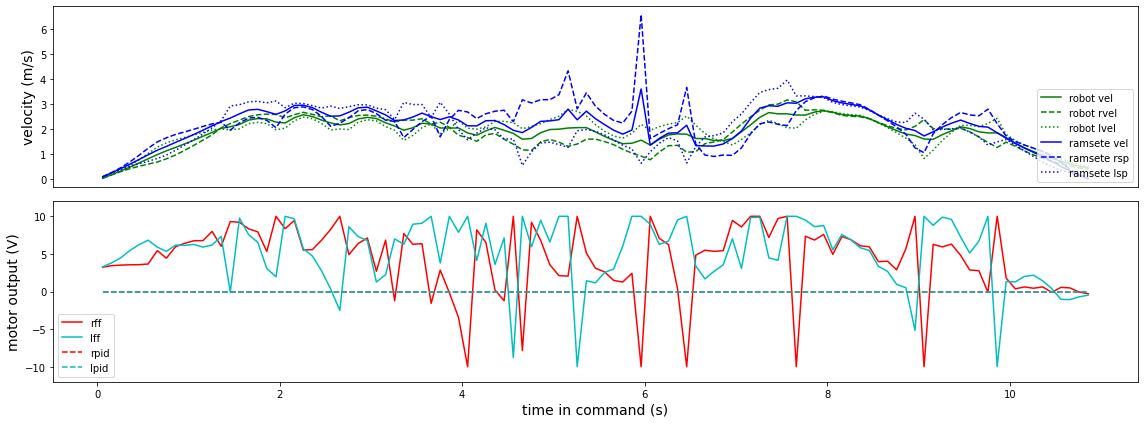

In [61]:
# get the latest trajectory
reload(tpu)
df_data, telemetry = tpu.get_data(file_name=-1, x_offset=0, y_offset=0)
tpu.plot_df(df_data, telemetry, guess_points=True, point_df=df_points, background='slalom', arrows=True, save=False)
tpu.velocity_plot(df_data)

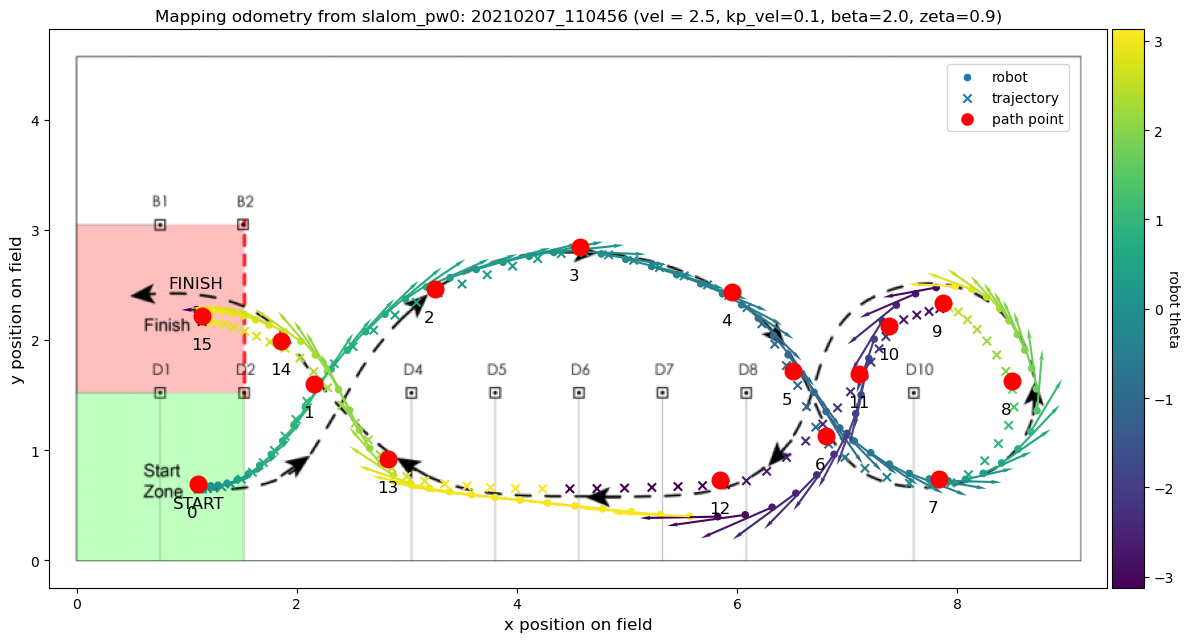

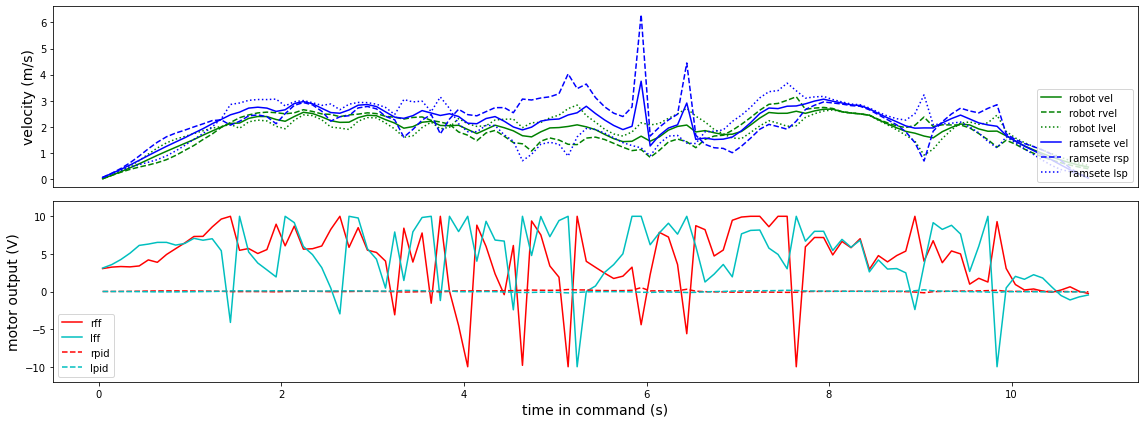

In [62]:
# get the latest trajectory
reload(tpu)
df_data, telemetry = tpu.get_data(file_name=-2, x_offset=0, y_offset=0)
tpu.plot_df(df_data, telemetry, guess_points=True, point_df=df_points, background='slalom', arrows=True, save=False)
tpu.velocity_plot(df_data)

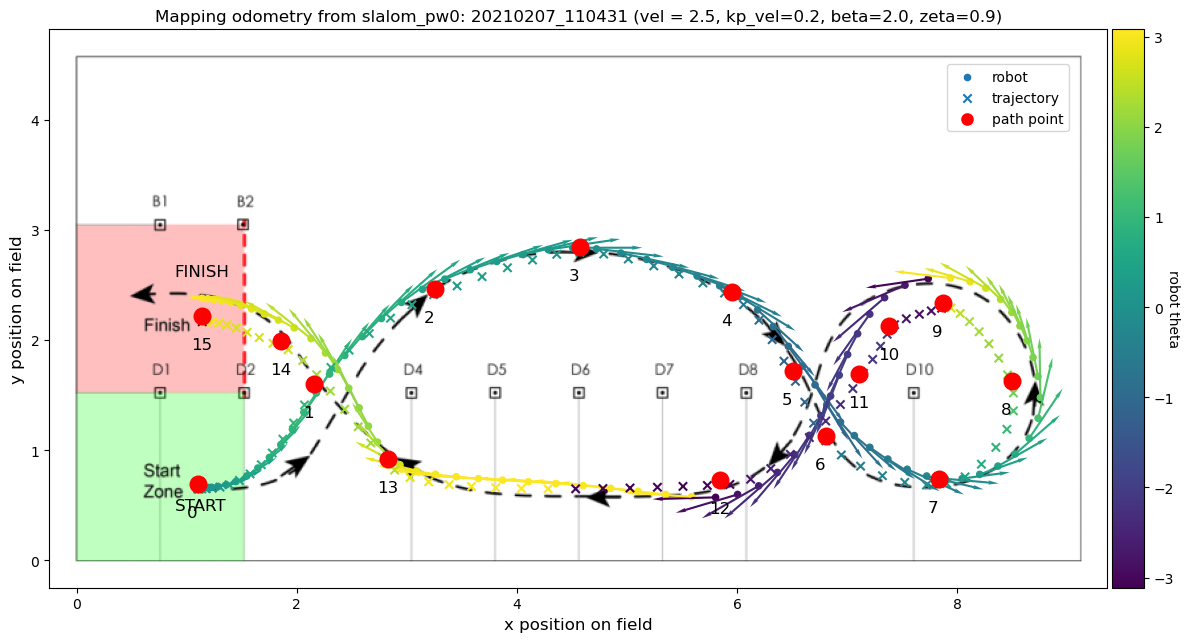

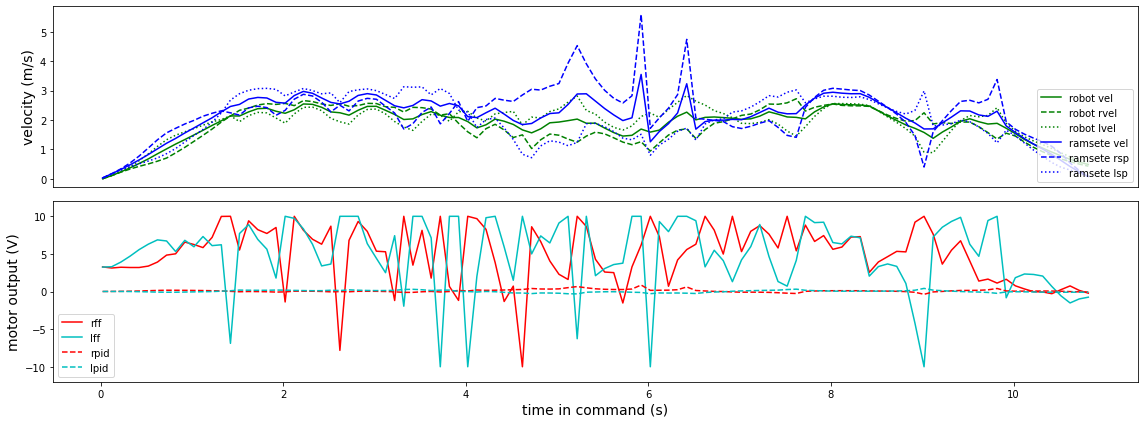

In [63]:
# get the latest trajectory
reload(tpu)
df_data, telemetry = tpu.get_data(file_name=-3, x_offset=0, y_offset=0)
tpu.plot_df(df_data, telemetry, guess_points=True, point_df=df_points, background='slalom', arrows=True, save=False)
tpu.velocity_plot(df_data)

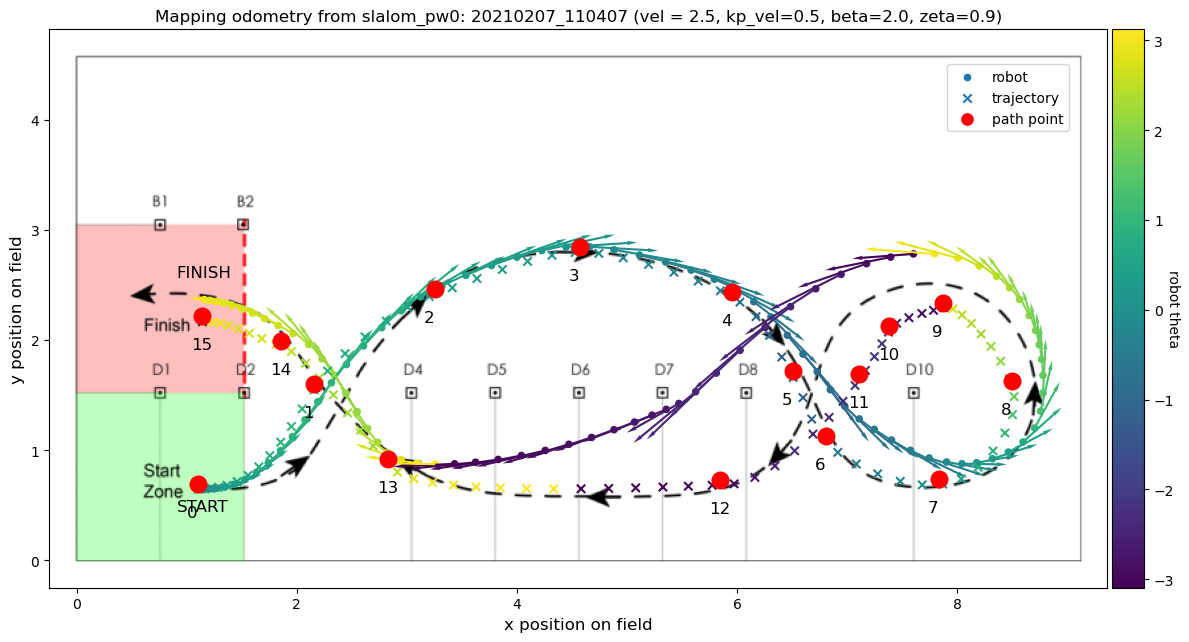

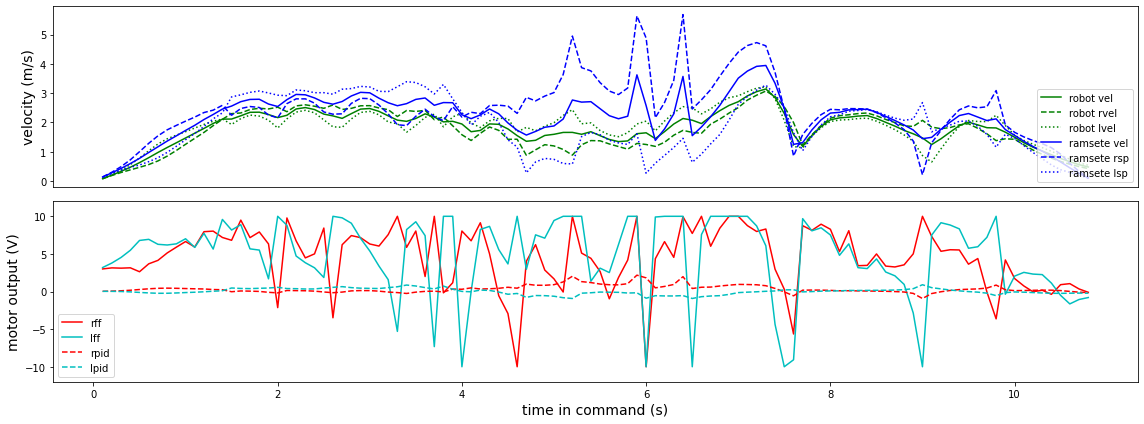

In [64]:
# get the latest trajectory
reload(tpu)
df_data, telemetry = tpu.get_data(file_name=-4, x_offset=0, y_offset=0)
tpu.plot_df(df_data, telemetry, guess_points=True, point_df=df_points, background='slalom', arrows=True, save=False)
tpu.velocity_plot(df_data)